## Task-Description:
- Create a 10x10 tensor in which the values are continuously incremented by 1 (line by line).
- Create the transpose of the tensor, making sure that the new tensor object points to the original data.
- Create a 9x9 submatrix by deleting the first row and column strike out. Now what is the stride, size, and offset of the new tensor object?
- Calculate the inverse of a 10x10 matrix with full rank with torch.inverse and multiply it by the initial matrix. Verify that the result is the unit matrix.
- Display a section of the cat.jpg image using the as_strided function. The displayed section should be resolved by factor of 2.

## Implementation:

In [1]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
# incrementing numbers from 0 to 99 stored in a list
inc_num_series = np.arange(0,100)
# print(inc_num_series)

# reshape list to a 10x10-Tensor
tensor = torch.tensor(inc_num_series).reshape((10,10)).to(torch.int8)
print(tensor)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]], dtype=torch.int8)


In [3]:
# transpose the tensor
tensor_trans = tensor.t()
print(tensor_trans)

# making sure the transposed tensor points to the original tensor
print("Object points to original data?", id(tensor.untyped_storage()) == id(tensor_trans.untyped_storage()))

tensor([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
        [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
        [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
        [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
        [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
        [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
        [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
        [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
        [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
        [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]], dtype=torch.int8)
Object points to original data? True


In [4]:
# creating a 9x9-Matrix by deleting the tensors first row and coloumn and making it a numpy array
tensor_small = tensor[1:,1:]
matrix = np.array(tensor_small)
print(matrix)

# checking stride, size, and offset of tensor_small
print("Stride:\t", tensor_small.stride())
print("Size:\t", tensor_small.size())
print("Offset:\t", tensor_small.storage_offset())

[[11 12 13 14 15 16 17 18 19]
 [21 22 23 24 25 26 27 28 29]
 [31 32 33 34 35 36 37 38 39]
 [41 42 43 44 45 46 47 48 49]
 [51 52 53 54 55 56 57 58 59]
 [61 62 63 64 65 66 67 68 69]
 [71 72 73 74 75 76 77 78 79]
 [81 82 83 84 85 86 87 88 89]
 [91 92 93 94 95 96 97 98 99]]
Stride:	 (10, 1)
Size:	 torch.Size([9, 9])
Offset:	 11


In [5]:
# Calculate the inverse of a 10x10 matrix with full rank with torch.inverse
detnotzero = False
while detnotzero is False:
    tensor_new = torch.randint(low=1, high=99, size=[10,10], dtype=torch.float)
    # print(tensor_new)
    try:
        tensor_inv = torch.inverse(tensor_new)
        detnotzero = True
    except:
        detnotzero = False

# round tensor_inv just for printing
tensor_inv_round = torch.round(tensor_inv, decimals=3)
print(tensor_inv_round)

# multiply the inverse with the initial matrix and verify if the output is the unity matrix
# multiply tensor with the inverse and round it to 3 decimal digits
tensor_unity = torch.round((tensor_new @ tensor_inv), decimals=3)

# create unity matrix
unity_matrix = np.eye(10, dtype=float)
unity_tensor = torch.tensor(unity_matrix)

# compare calculated unity matrix with original unity matrix
print("Matrix * Inverse = Unity Matrix?", torch.equal(unity_tensor, tensor_unity))

tensor([[-0.0070,  0.0090, -0.0160,  0.0120, -0.0030, -0.0090,  0.0050,  0.0050,
          0.0130,  0.0030],
        [ 0.0080, -0.0110, -0.0030, -0.0010,  0.0060, -0.0030,  0.0030, -0.0080,
         -0.0010,  0.0070],
        [ 0.0050, -0.0080,  0.0000,  0.0090, -0.0090,  0.0050,  0.0060, -0.0060,
         -0.0090,  0.0010],
        [-0.0050,  0.0020,  0.0070, -0.0010,  0.0050, -0.0030, -0.0060,  0.0050,
          0.0070,  0.0000],
        [ 0.0020,  0.0020,  0.0210, -0.0160,  0.0170,  0.0080, -0.0080,  0.0080,
         -0.0120, -0.0200],
        [-0.0030,  0.0130,  0.0090, -0.0090,  0.0040, -0.0020, -0.0000,  0.0050,
         -0.0030, -0.0070],
        [ 0.0050, -0.0080, -0.0040, -0.0020, -0.0130,  0.0040,  0.0030,  0.0000,
         -0.0040,  0.0120],
        [-0.0090, -0.0030, -0.0120,  0.0090,  0.0000, -0.0000,  0.0080, -0.0080,
          0.0100,  0.0080],
        [ 0.0030,  0.0040,  0.0170, -0.0170,  0.0060,  0.0020, -0.0100,  0.0080,
          0.0060, -0.0140],
        [ 0.0010,  

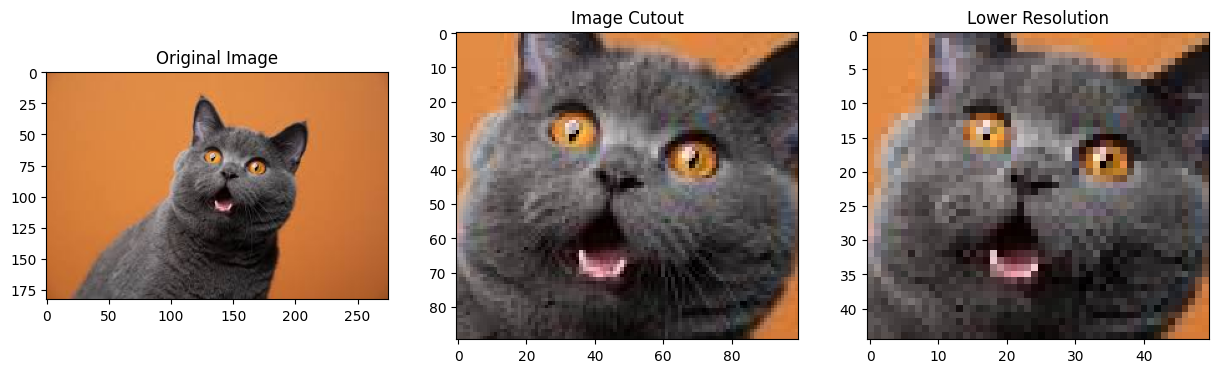

In [20]:
# open and preprocess image
img = Image.open("cat3.jpg")
preprocess = transforms.ToTensor()
img_t = preprocess(img).permute(1,2,0)

# cut out the image at a suitable place
img_cutout = img_t[40:130, 100:200,:]

# create the image cutout with half resolution by using as_strided
size_half = (img_cutout.shape[0]//2, img_cutout.shape[1]//2, img_cutout.shape[2]) # Reduce size by half
stride_double = (img_t.stride()[0]*2, img_t.stride()[1]*2, img_t.stride()[2]) # double stride
img_strided = torch.as_strided(img_cutout, size=size_half, stride=stride_double)

# plot results
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].imshow(img_t)
axs[0].set_title("Original Image")
axs[1].imshow(img_cutout)
axs[1].set_title("Image Cutout")
axs[2].imshow(img_strided)
axs[2].set_title("Lower Resolution")
plt.show()